In [1]:
#300개의 과일 데이터 로딩
#!로 시작하는 구문은 리눅스 쉘 명령임
#wget은 원격 주소에서 데이터를 다운로드하는 명령어, -0 옵션으로 저장할 파일명 지정
#npy는 넘파이 배열의 기본 저장 포맷
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-11-15 10:16:35--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-15 10:16:35--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-15 10:16:36--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')

In [3]:
#300개의 샘플, 한 샘플당 이미지의 크기는 100행 100열
print(fruits.shape)

(300, 100, 100)


In [4]:
#첫 행을 출력
#그레이스케일 이미지이므로 0~255까지의 정수값을 가짐
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


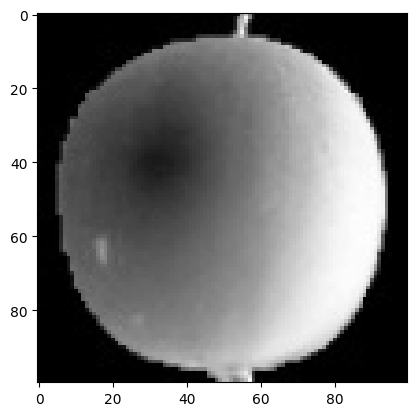

In [5]:
#이미지로 표현
plt.imshow(fruits[0], cmap='gray')
plt.show()

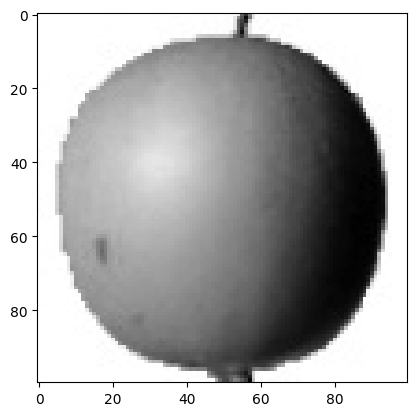

In [7]:
#이미지로 표현 - 배경을 흰색으로
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

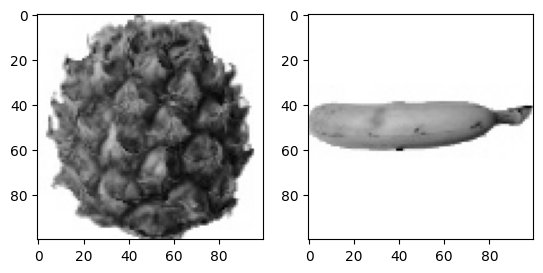

In [8]:
#파인애플과 바나나 이미지도 출력
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [9]:
#과일별로 구분한 후 계산의 편의를 위해 1차원 배열(100*100)로 변경
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)
print(apple.shape, pineapple.shape, banana.shape)

(100, 10000) (100, 10000) (100, 10000)


In [10]:
#과일을 분류하기 위해 각 과일의 픽셀 평균값을 구함
#axis(축)이 0이면 행방향, 1이면 열방향으로 지정
m_apple = apple.mean(axis=1) #np.mean(apple, axis=1)
m_pineapple = pineapple.mean(axis=1)
m_banana = banana.mean(axis=1)

In [11]:
#100개의 사과 샘플의 픽셀 평균 출력
print(m_apple)

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


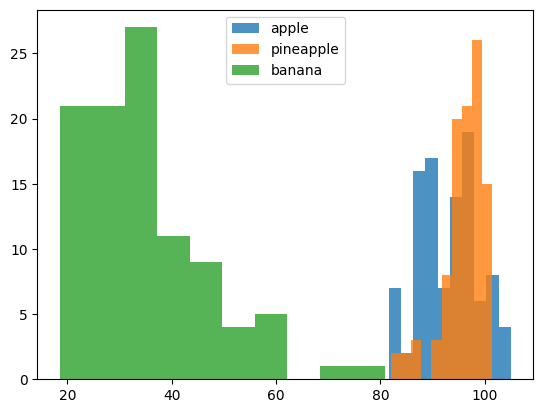

In [12]:
#샘플별 픽셀평균의 분포를 나타내는 히스토그램
#히스토그램: 값이 발생한 빈도를 그래프로 표시
#alpha: 1보다 작게 주면 투명도를 줄 수 있음
#legend: 범례 생성
#히스토그램의 결과 바나나는 평균 40 정도, 사과와 파인애플은 평균 90-1100 정도임
plt.hist(m_apple, alpha=0.8)
plt.hist(m_pineapple, alpha=0.8)
plt.hist(m_banana, alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

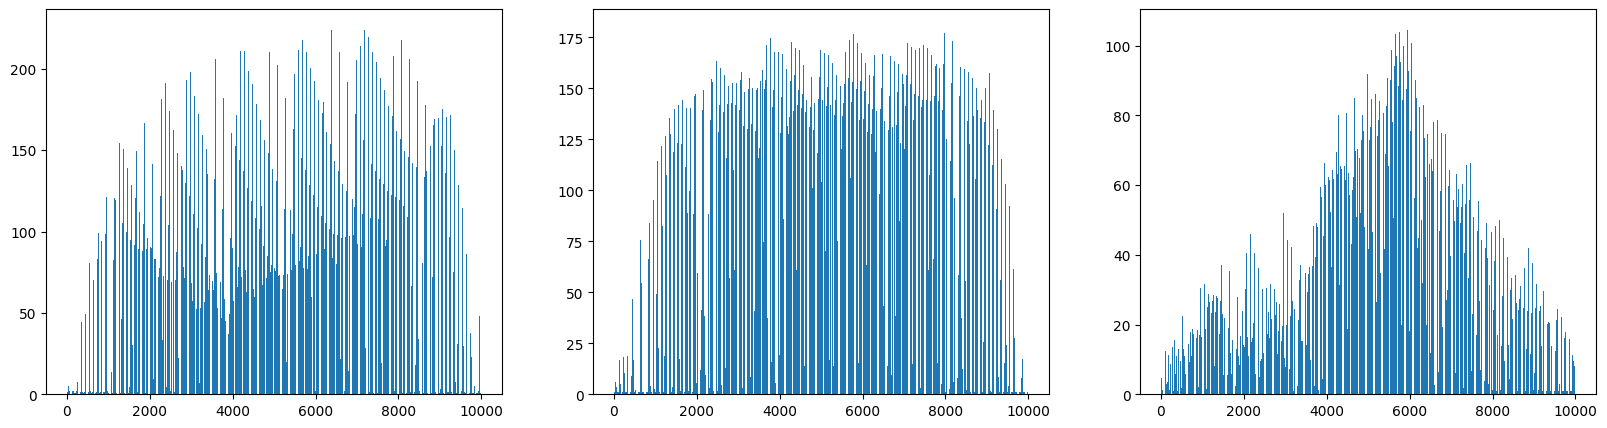

In [13]:
#사과와 파인애플을 구별하기 위해 샘플당 평균이 아니라 픽셀당 평균을 구함
#과일별 픽셀당 평균을 구하기 위해서 mean 함수의 axis=0(행방향)으로 변경하면 됨
fig,axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

In [14]:
#픽셀 평균값을 100*100인 2차원으로 변경
apple_mean = np.mean(apple, axis=0).reshape(-1,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(-1,100)
banana_mean = np.mean(banana, axis=0).reshape(-1,100)

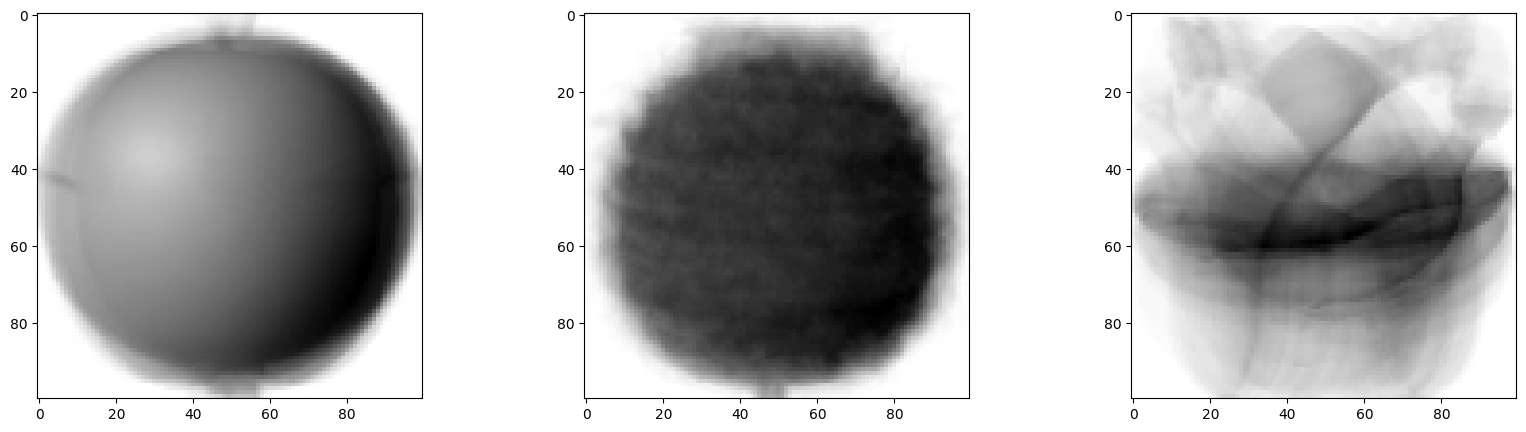

In [15]:
#픽셀 평균값을 100*100 2차원 이미지로 변경
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

In [16]:
#사과 평균값과 300개의 샘플과의 절대값 오차를 구함
abs_diff = np.abs(fruits - apple_mean)
print(abs_diff.shape)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300, 100, 100)
(300,)


[[33 48 70 57 87 12 78 59  1 74]
 [86 38 50 92 69 27 68 30 66 24]
 [76 98 15 84 47 90  3 94 53 23]
 [14 71 32  7 73 36 55 77 21 10]
 [17 39 99 95 11 35 65  6 61 22]
 [56 89  2 13 80  0 97  4 58 34]
 [40 43 75 82 54 16 31 49 93 37]
 [63 64 41 28 67 25 96  8 83 46]
 [19 79 72  5 85 29 20 60 81  9]
 [45 51 88 62 91 26 52 18 44 42]]


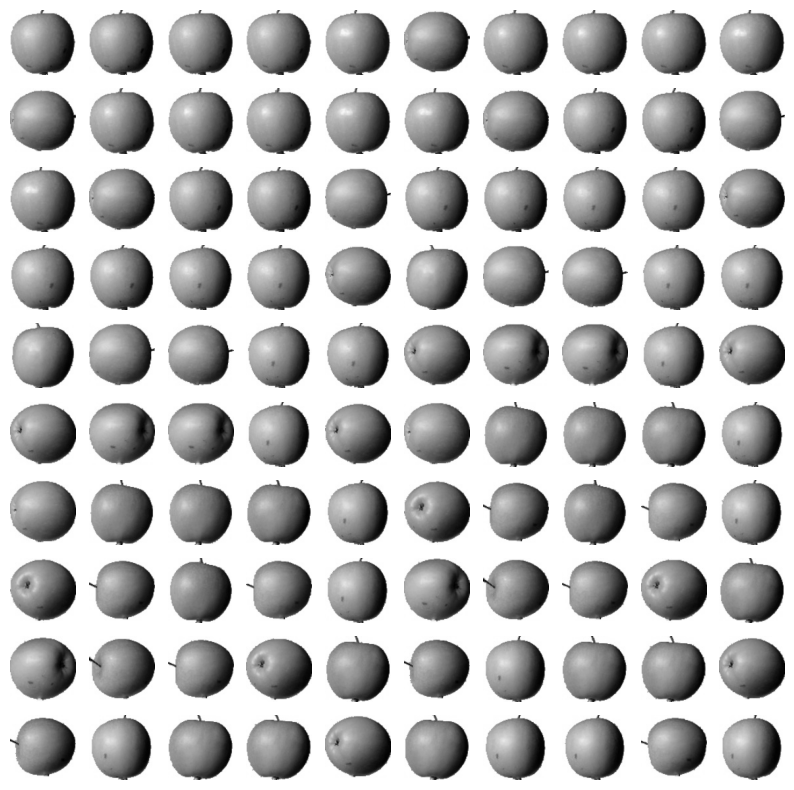

In [17]:
#가장 오차가 작은 샘플 100개를 선택
apple_index = np.argsort(abs_mean)[:100] #argsort는 작은 값에서 큰 값으로 나열
print(apple_index.reshape(-1,10))
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*5+j]], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()